In [4]:
import random
import numpy as np
import pandas as pd
from cheese import CheeseGrid
from cheese import PERMISSIVE, RESISTANT, LATENT, INFECTIOUS, PIERCED, STAGNANT
from cheese import CELL_STATE

In [5]:
def simulation(to_pierce, density, latent_factor, days=130, seed=42):
    
    random.seed(seed)
    np.random.seed(seed)
    
    grid = CheeseGrid(volume=70, to_pierce=to_pierce, density=density, latent_factor=latent_factor)
    
    for _ in range(days):
        grid.pass_day()
    
    arr = np.array([[[c[CELL_STATE] for c in p] for p in r] for r in grid.cells])
    
    return arr

In [6]:
def get_fungus_percentage(arr):

    target_mask = (arr == LATENT) | (arr == INFECTIOUS) | (arr == STAGNANT)
    count = np.sum(target_mask)
    percentage = (count / arr.size) * 100

    return percentage

In [7]:
def get_internal_fungus_percentage(arr, trim=2):
    
    core = arr[trim:-trim, trim:-trim, trim:-trim]
    
    target_mask = (core == LATENT) | (core == INFECTIOUS) | (core == STAGNANT)
    
    count = np.sum(target_mask)
    percentage = (count / core.size) * 100
    
    return percentage

In [8]:
def get_border_only_percentage(arr, trim=2):
    
    full_mask = (arr == LATENT) | (arr == INFECTIOUS) | (arr == STAGNANT)
    
    core = arr[trim:-trim, trim:-trim, trim:-trim]
    core_mask = (core == LATENT) | (core == INFECTIOUS) | (core == STAGNANT)
    
    total_count = np.sum(full_mask)
    core_count = np.sum(core_mask)
    border_count = total_count - core_count

    border_volume = arr.size - core.size
    
    percentage = (border_count / border_volume) * 100
    
    return percentage

In [9]:
def fungus_progress(days, seed=42):
    
    random.seed(seed)
    np.random.seed(seed)
    
    cheese = CheeseGrid(70, 15, 10, 0.5)
    progress = {'days': [], 'percentages': {'total': [], 'internal': [], 'border': []}}
    
    for day in range(days):
        arr = np.array([[[c[CELL_STATE] for c in p] for p in r] for r in cheese.cells])
        progress['percentages']['total'].append(get_fungus_percentage(arr))
        progress['percentages']['internal'].append(get_internal_fungus_percentage(arr))
        progress['percentages']['border'].append(get_border_only_percentage(arr))
        progress['days'].append(day)
        cheese.pass_day()
        
    return progress

In [10]:
progress_dict = fungus_progress(130)

In [11]:
df0 = pd.DataFrame(
    progress_dict['percentages'],
    index=progress_dict['days']
)

display(df0)

,total,internal,border
0,18.092711,18.366516,16.674474
1,18.092711,18.366516,16.674474
2,18.092711,18.366516,16.674474
3,18.092711,18.366516,16.674474
4,18.092711,18.366516,16.674474
...,...,...,...
125,31.558892,31.394176,32.412078
126,31.558892,31.394176,32.412078
127,31.558892,31.394176,32.412078
128,31.558892,31.394176,32.412078


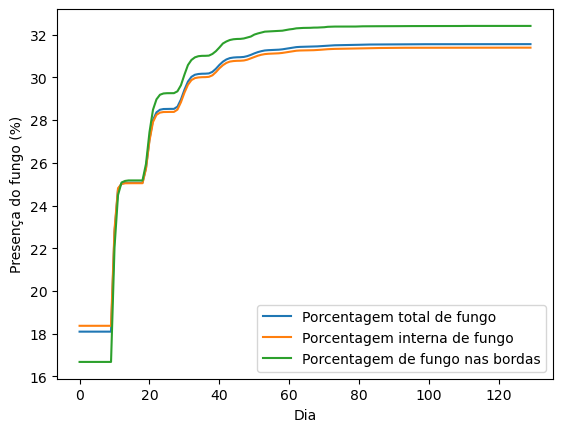

In [12]:
ax0 = df0.plot(
    xlabel='Dia',
    ylabel='Presença do fungo (%)'
)

ax0.legend(['Porcentagem total de fungo', 'Porcentagem interna de fungo', 'Porcentagem de fungo nas bordas'])
ax0.figure.savefig("grafico_fungos0.png", dpi=300, bbox_inches="tight")

In [13]:
to_pierces = [
    6, 8, 10, 12, 14, 16, 18,
    20, 22, 25, 28, 32, 35
]

densities = [
    0.5, 0.8, 1.0, 1.3, 1.7,
    2.0, 2.5, 3.0, 3.5, 4.0,
    5.0, 6.0, 7.0, 8.0, 9.0,
    10.0, 12.0, 14.0, 16.0
]

latent_factors = [
    0.1, 0.2, 0.3, 0.4,
    0.5, 0.6, 0.7, 0.8,
    0.9, 1.0, 1.2, 1.5,
    2.0
]

In [14]:
to_pierce_results = {}

for to_pierce in to_pierces:
    arr = simulation(to_pierce, 10, 0.5)
    to_pierce_results[str(to_pierce)] = {'fungus_percentage': get_fungus_percentage(arr), 
                                     'internal_fungus_percentage': get_internal_fungus_percentage(arr), 
                                     'border_only_percentage': get_border_only_percentage(arr)}

In [15]:
density_results = {}

for density in densities:
    arr = simulation(15, density, 0.5)
    density_results[str(density)] = {'fungus_percentage': get_fungus_percentage(arr), 
                                     'internal_fungus_percentage': get_internal_fungus_percentage(arr), 
                                     'border_only_percentage': get_border_only_percentage(arr)}

In [16]:
latent_factor_results = {}

for lf in latent_factors:
    arr = simulation(15, 10, lf)
    latent_factor_results[str(lf)] = {'fungus_percentage': get_fungus_percentage(arr), 
                                     'internal_fungus_percentage': get_internal_fungus_percentage(arr), 
                                     'border_only_percentage': get_border_only_percentage(arr)}

In [17]:
df1 = pd.DataFrame(to_pierce_results).T
display(df1)

,fungus_percentage,internal_fungus_percentage,border_only_percentage
6,52.295918,55.808081,34.103848
8,46.920117,49.160684,35.314572
10,42.150437,43.684434,34.204742
12,37.297959,38.049921,33.402998
14,34.108746,34.356652,32.824661
16,28.926239,28.352394,31.898602
18,28.736152,28.207001,31.477011
20,25.462682,24.393035,31.003171
22,22.399125,20.990901,29.693355
25,24.310496,23.061538,30.779764


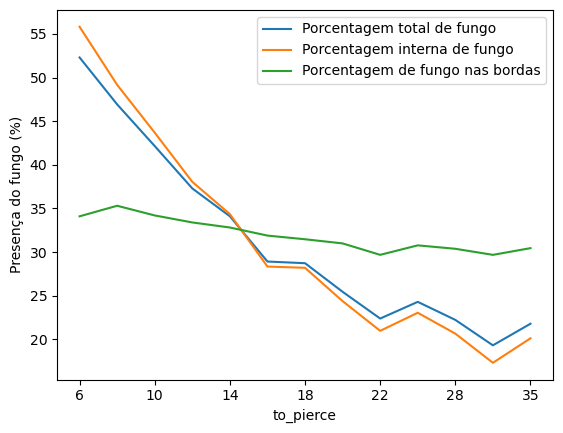

In [18]:
ax1 = df1.plot(kind="line", xlabel='to_pierce', ylabel='Presença do fungo (%)')
ax1.legend(['Porcentagem total de fungo', 'Porcentagem interna de fungo', 'Porcentagem de fungo nas bordas'])

ax1.figure.savefig("grafico_fungos1.png", dpi=300, bbox_inches="tight")

In [19]:
df2 = pd.DataFrame(density_results).T
display(df2)

,fungus_percentage,internal_fungus_percentage,border_only_percentage
0.5,67.681050,72.716838,41.597002
0.8,67.062682,72.013176,41.420438
1.0,66.630029,71.563083,41.078120
1.3,65.969388,70.767593,41.115956
1.7,64.730321,69.376617,40.663736
2.0,63.966764,68.490344,40.535817
2.5,62.327697,66.639536,39.993514
3.0,60.749563,64.838815,39.568319
3.5,58.860058,62.664872,39.152133
4.0,56.693878,60.171272,38.681897


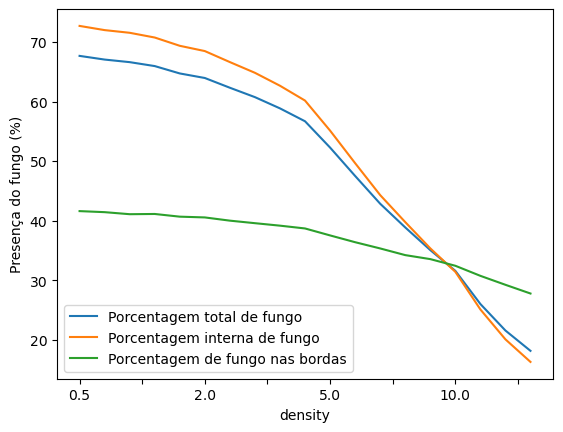

In [20]:
ax2 = df2.plot(kind="line", xlabel='density', ylabel='Presença do fungo (%)')
ax2.legend(['Porcentagem total de fungo', 'Porcentagem interna de fungo', 'Porcentagem de fungo nas bordas'])

ax2.figure.savefig("grafico_fungos2.png", dpi=300, bbox_inches="tight")

In [21]:
df3 = pd.DataFrame(latent_factor_results).T
display(df3)

,fungus_percentage,internal_fungus_percentage,border_only_percentage
0.1,15.305831,14.191154,21.079562
0.2,20.882507,19.950538,25.709859
0.3,25.092420,24.464340,28.345705
0.4,28.505539,28.170131,30.242865
0.5,31.558892,31.394176,32.412078
0.6,34.647813,34.768832,34.020971
0.7,37.147813,37.483304,35.410061
0.8,39.849271,40.384562,37.076607
0.9,42.407289,43.190166,38.352191
1.0,44.827114,45.779420,39.894422


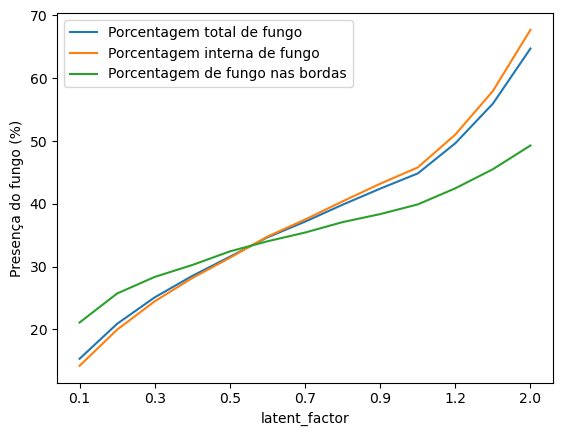

In [22]:
ax3 = df3.plot(kind="line", xlabel='latent_factor', ylabel='Presença do fungo (%)')
ax3.legend(['Porcentagem total de fungo', 'Porcentagem interna de fungo', 'Porcentagem de fungo nas bordas'])

In [23]:
cases = {
    "case_01": {"to_pierce": 8,  "density": 0.8},
    "case_02": {"to_pierce": 8,  "density": 1.5},
    "case_03": {"to_pierce": 8,  "density": 2.5},

    "case_04": {"to_pierce": 12, "density": 1.0},
    "case_05": {"to_pierce": 12, "density": 2.0},
    "case_06": {"to_pierce": 12, "density": 3.0},

    "case_07": {"to_pierce": 15, "density": 1.0},
    "case_08": {"to_pierce": 15, "density": 2.5},
    "case_09": {"to_pierce": 15, "density": 4.0},

    "case_10": {"to_pierce": 18, "density": 1.5},
    "case_11": {"to_pierce": 18, "density": 3.0},
    "case_12": {"to_pierce": 18, "density": 5.0},

    "case_13": {"to_pierce": 22, "density": 2.0},
    "case_14": {"to_pierce": 22, "density": 4.0},
    "case_15": {"to_pierce": 22, "density": 6.0},

    "case_16": {"to_pierce": 28, "density": 3.0},
    "case_17": {"to_pierce": 28, "density": 5.0},
    "case_18": {"to_pierce": 28, "density": 7.0},
}

In [24]:
for case in cases.values():
    arr = simulation(case['to_pierce'], case['density'], 0.5)
    case['fungus_percentage'] = get_fungus_percentage(arr)
    case['internal_fungus_percentage'] = get_internal_fungus_percentage(arr)
    case['border_only_percentage'] = get_border_only_percentage(arr)

In [25]:
result = pd.DataFrame(cases).T
display(result)

,to_pierce,density,fungus_percentage,internal_fungus_percentage,border_only_percentage
case_01,8.0,0.8,66.965598,71.894565,41.434852
case_02,8.0,1.5,65.895918,70.722723,40.894350
case_03,8.0,2.5,64.495918,69.098005,40.658331
case_04,12.0,1.0,66.777551,71.719259,41.180816
case_05,12.0,2.0,64.930904,69.604447,40.723191
case_06,12.0,3.0,62.323907,66.626666,40.036754
case_07,15.0,1.0,66.630029,71.563083,41.078120
case_08,15.0,2.5,62.327697,66.639536,39.993514
case_09,15.0,4.0,56.693878,60.171272,38.681897
case_10,18.0,1.5,65.054227,69.748449,40.739406
